<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/groupassignment2025retry6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Data Preprocessing

import pandas as pd
import numpy as np

# Load the dataset (ensure 'train.csv' is in the working directory)
df = pd.read_csv('train.csv')

# Print the initial shape of the dataset
print("Initial shape of train data:", df.shape)

# Drop any rows with missing values
df = df.dropna()
print("Shape after dropping missing values:", df.shape)

# Check if any force_meas values are non-positive
if (df['force_meas'] <= 0).any():
    raise ValueError("There are non-positive values in force_meas!")
else:
    print("All force_meas values are positive.")

# Display basic information and the first 5 rows of the dataset
print("Dataset info:")
print(df.info())
print("First 5 rows:")
print(df.head())


Initial shape of train data: (18741, 35)
Shape after dropping missing values: (18740, 35)
All force_meas values are positive.
Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 18740 entries, 0 to 18739
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tappingsteelgrade     18740 non-null  object 
 1   force_meas            18740 non-null  float64
 2   speed                 18740 non-null  float64
 3   entrytemperature      18740 non-null  float64
 4   entrytemperaturebot   18740 non-null  float64
 5   entrytemperaturecore  18740 non-null  float64
 6   entrytemperaturetop   18740 non-null  float64
 7   entrythickness        18740 non-null  float64
 8   entrywidth            18740 non-null  float64
 9   exitthickness         18740 non-null  float64
 10  zeropoint             18740 non-null  float64
 11  radius                18740 non-null  float64
 12  pctal                 18740 non-null 

In [ ]:
# Select features by dropping the target column 'force_meas'
features = df.drop(columns=['force_meas'])
target = df['force_meas']

# Convert the categorical column 'tappingsteelgrade' using one-hot encoding
if 'tappingsteelgrade' in features.columns:
    features = pd.get_dummies(features, columns=['tappingsteelgrade'], drop_first=True)

print("Features shape after encoding:", features.shape)


from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

print("Feature scaling completed. Sample of scaled features:")
print(X_scaled[:5])


Features shape after encoding: (18740, 56)
Feature scaling completed. Sample of scaled features:
[[-1.20508792e+00  1.62965337e+00  1.10811970e+00  1.76857847e+00
   9.93982742e-01  1.45205203e+00  3.67211646e-01  1.28025798e+00
  -2.78962945e-01  1.73111125e+00 -8.51159342e-01 -1.95474602e+00
   1.28519135e+00  2.69464606e-01  0.00000000e+00 -4.86948941e-01
  -3.98083604e-01  3.60074479e-01  0.00000000e+00 -2.05370375e+00
  -8.16150867e-01 -8.30042669e-01 -1.20095624e+00 -3.64509229e-01
  -1.47024959e+00  1.43886224e+00  1.66903598e+00 -1.49395116e+00
  -7.12974095e-01 -9.57176464e-01 -1.08105134e+00 -1.66510560e+00
   4.40596805e-01 -3.93686479e-02  3.15073225e+00 -2.98482242e-01
  -6.78989783e-02 -1.63341806e-01 -3.26860225e-02 -1.63364675e-02
  -1.26465387e-01 -1.50488065e-01 -3.94794351e-01 -3.45747294e-01
  -3.13603578e-01 -2.79844432e-01 -2.27994709e-01 -3.42832211e-02
  -1.05942574e-01 -1.46113908e-02 -3.50546631e-02 -1.03312621e-02
  -2.75048132e-01 -1.63364675e-02 -3.98847920

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Split the scaled features and target into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_scaled, df['force_meas'], test_size=0.2, random_state=42)

# Define 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)


lr = LinearRegression()
lr_cv_scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
print("Linear Regression CV MAE: {:.4f}".format(-np.mean(lr_cv_scores)))

# -------------------------------
# Decision Tree Regressor with Grid Search
# -------------------------------
dt = DecisionTreeRegressor(random_state=42)
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
dt_grid = GridSearchCV(dt, dt_param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
dt_grid.fit(X_train, y_train)
print("Decision Tree best params:", dt_grid.best_params_)
print("Decision Tree CV MAE: {:.4f}".format(-dt_grid.best_score_))

# -------------------------------
# Random Forest Regressor with Grid Search
# -------------------------------
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(rf, rf_param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Random Forest best params:", rf_grid.best_params_)
print("Random Forest CV MAE: {:.4f}".format(-rf_grid.best_score_))

# -------------------------------
# Gradient Boosting Regressor with Grid Search
# -------------------------------
gb = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(gb, gb_param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
gb_grid.fit(X_train, y_train)
print("Gradient Boosting best params:", gb_grid.best_params_)
print("Gradient Boosting CV MAE: {:.4f}".format(-gb_grid.best_score_))

# -------------------------------
# Evaluate each model on the validation set
# -------------------------------
models = {
    'Linear Regression': lr,
    'Decision Tree': dt_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_,
    'Gradient Boosting': gb_grid.best_estimator_
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"{name} Validation MAE: {mae:.4f}")
    print(f"{name} Validation RMSE: {rmse:.4f}")


Linear Regression CV MAE: 5530930.6036
Decision Tree best params: {'max_depth': 10, 'min_samples_split': 10}
Decision Tree CV MAE: 6586591.3970
Random Forest best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest CV MAE: 5102189.1475
Gradient Boosting best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Gradient Boosting CV MAE: 4965115.6889
Linear Regression Validation MAE: 5617899.1469
Linear Regression Validation RMSE: 7308625.1658
Decision Tree Validation MAE: 6583854.2908
Decision Tree Validation RMSE: 8584133.7299
Random Forest Validation MAE: 4920905.1283
Random Forest Validation RMSE: 6366341.4165
Gradient Boosting Validation MAE: 4968688.1502
Gradient Boosting Validation RMSE: 6349974.3617


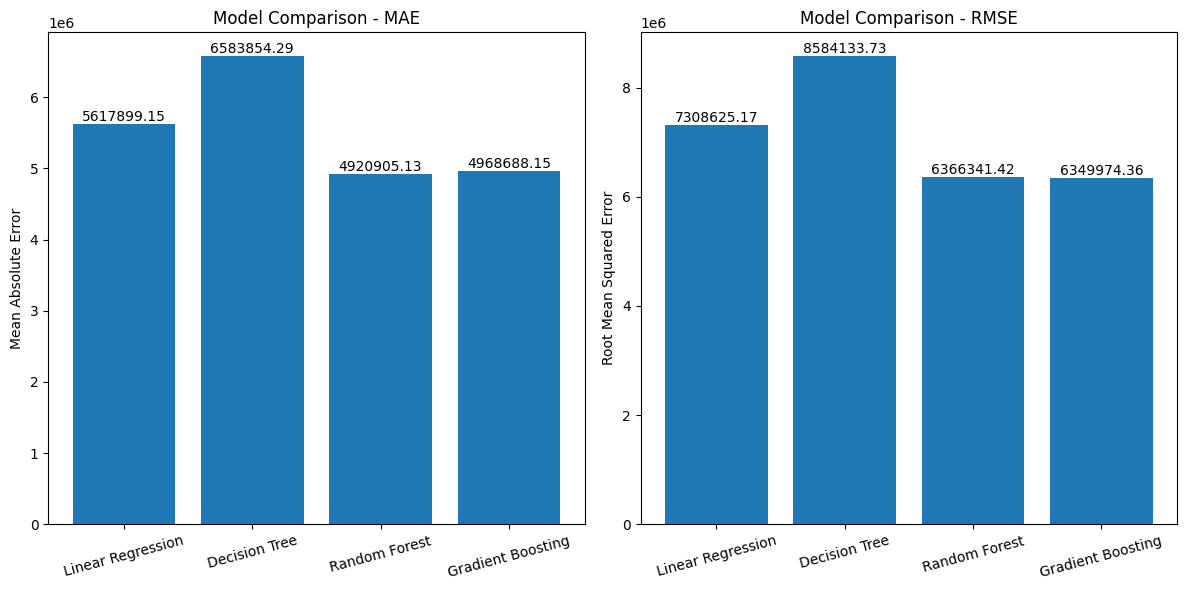

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


model_names = []
mae_scores = []
rmse_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    model_names.append(name)
    mae_scores.append(mean_absolute_error(y_val, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))


plt.figure(figsize=(12, 6))

# -------- MAE  --------
plt.subplot(1, 2, 1)
bars1 = plt.bar(model_names, mae_scores)
plt.title("Model Comparison - MAE")
plt.ylabel("Mean Absolute Error")
plt.xticks(rotation=15)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# -------- RMSE  --------
plt.subplot(1, 2, 2)
bars2 = plt.bar(model_names, rmse_scores)
plt.title("Model Comparison - RMSE")
plt.ylabel("Root Mean Squared Error")
plt.xticks(rotation=15)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()


In [ ]:
import pickle
# Save the fitted scaler for later use
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)  # Save the scaler object

# Save the best Random Forest model (obtained from GridSearchCV)
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(rf_grid.best_estimator_, f)  # Save the best RF model

# Save the best Gradient Boosting model (obtained from GridSearchCV)
with open('best_gb_model.pkl', 'wb') as f:
    pickle.dump(gb_grid.best_estimator_, f)  # Save the best GB model

# Save the training columns (features names) for later use
training_columns = features.columns.tolist()  # 'features' 是经过预处理后用于训练的 DataFrame
with open('training_columns.pkl', 'wb') as f:
    pickle.dump(training_columns, f)
print("Training columns have been saved successfully.")

Training columns have been saved successfully.


In [ ]:
# ===============================
# Step 11: Final Evaluation on Test Data
# ===============================

import pandas as pd
import numpy as np
import pickle
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load test data (ensure test.csv is in your working directory)
test_df = pd.read_csv('test.csv')

# Drop missing values if any (you may adjust based on your preprocessing strategy)
test_df = test_df.dropna()

# For test data, note: do not use the 'force_pre' column for prediction, it's the baseline.
# We assume test_df contains 'force_pre' and other features including 'tappingsteelgrade'
# Also assume that 'force_meas' is present for evaluation
# If not, adjust accordingly (for final evaluation, force_meas is needed)

# Separate baseline predictions for later comparison
baseline_force_pre = test_df['force_pre']

# Separate target variable for evaluation (force_meas)
y_test = test_df['force_meas']

# ===============================
# Preprocessing: Feature Selection & Encoding
# ===============================
# Exclude the target 'force_meas' and baseline column 'force_pre'
features_test = test_df.drop(columns=['force_meas', 'force_pre'])

# One-hot encode the categorical column 'tappingsteelgrade' (using the same columns as during training)
features_test = pd.get_dummies(features_test, columns=['tappingsteelgrade'], drop_first=True)

# IMPORTANT: Align the test features with the training features.
# Load the fitted scaler (assumes scaler.pkl was saved during training)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# To ensure that test data has the same feature columns as training data,
# we reindex the test DataFrame to match training columns.
# Assume that 'training_columns' was saved during training.
with open('training_columns.pkl', 'rb') as f:
    training_columns = pickle.load(f)

# Reindex the test features DataFrame; missing columns will be filled with zeros.
features_test = features_test.reindex(columns=training_columns, fill_value=0)

# Scale the test features using the saved scaler
X_test_scaled = scaler.transform(features_test)

# ===============================
# Load the saved models
# ===============================
# Load best Random Forest model
with open('best_rf_model.pkl', 'rb') as f:
    best_rf_model = pickle.load(f)

# Load best Gradient Boosting model
with open('best_gb_model.pkl', 'rb') as f:
    best_gb_model = pickle.load(f)

# ===============================
# Evaluate Models on Test Data
# ===============================
# Evaluate Random Forest model
start_time = time.time()
rf_predictions = best_rf_model.predict(X_test_scaled)
rf_runtime = (time.time() - start_time)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mse = mean_squared_error(y_test, rf_predictions)

# Evaluate Gradient Boosting model
start_time = time.time()
gb_predictions = best_gb_model.predict(X_test_scaled)
gb_runtime = (time.time() - start_time)

gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_mse = mean_squared_error(y_test, gb_predictions)

# Print evaluation metrics
print("Final Evaluation Metrics:")
print("Random Forest - MAE: {:.4f}, RMSE: {:.4f}, MSE: {:.4f}, Avg Runtime per sample: {:.6f} sec".format(
    rf_mae, rf_rmse, rf_mse, rf_runtime))
print("Gradient Boosting - MAE: {:.4f}, RMSE: {:.4f}, MSE: {:.4f}, Avg Runtime per sample: {:.6f} sec".format(
    gb_mae, gb_rmse, gb_mse, gb_runtime))

# Compare with baseline force_pre (if available)
# Calculate baseline evaluation metrics using force_pre column
baseline_mae = mean_absolute_error(y_test, baseline_force_pre)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_force_pre))
baseline_mse = mean_squared_error(y_test, baseline_force_pre)

print("Baseline (force_pre) - MAE: {:.4f}, RMSE: {:.4f}, MSE: {:.4f}".format(
    baseline_mae, baseline_rmse, baseline_mse))


Final Evaluation Metrics:
Random Forest - MAE: 4845642.3052, RMSE: 6330958.0330, MSE: 40081029614984.8828, Avg Runtime per sample: 0.402613 sec
Gradient Boosting - MAE: 4892831.9861, RMSE: 6272410.9957, MSE: 39343139699307.8750, Avg Runtime per sample: 0.052553 sec
Baseline (force_pre) - MAE: 2898684.1133, RMSE: 3775600.3207, MSE: 14255157781834.8516


In [ ]:
# Install Keras Tuner if not already installed
!pip install keras-tuner

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import keras_tuner as kt
import numpy as np

# Define a model-building function for the tuner
def build_model(hp):
    """
    Build a DNN model with hyperparameters to tune.
    """
    model = keras.Sequential()

    # Input layer using an Input layer is preferred
    model.add(keras.Input(shape=(X_train.shape[1],)))  # X_train为训练集特征，确保在运行前定义好

    # Tune the number of layers (at least 1 layer)
    num_layers = hp.Int('num_layers', 1, 3, default=2)

    for i in range(num_layers):
        # Tune the number of units in this layer
        units = hp.Int(f'units_{i}', min_value=32, max_value=256, step=32, default=64)
        # Tune dropout rate for this layer
        dropout_rate = hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1, default=0.2)
        # Tune L2 regularization factor
        l2_reg = hp.Float(f'l2_reg_{i}', 1e-5, 1e-3, sampling='LOG', default=1e-4)

        model.add(layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))

    # Output layer
    model.add(layers.Dense(1))

    # Tune learning rate for the optimizer
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG', default=1e-3)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mse',
                  metrics=['mae'])
    return model

# Set up the tuner: Here we use Hyperband search algorithm
tuner = kt.Hyperband(
    build_model,
    objective='val_mae',
    max_epochs=50,
    factor=3,
    directory='dnn_tuner_dir',
    project_name='force_prediction_tuning'
)

# Optional: Early stopping callback to stop training if no improvement
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Perform hyperparameter search
tuner.search(X_train, y_train,
             epochs=50,
             validation_split=0.2,
             callbacks=[stop_early],
             verbose=1)

# Retrieve the best hyperparameters and build the best model
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters found:", best_hp.values)

# Build the best model and train it
best_model = tuner.hypermodel.build(best_hp)
history = best_model.fit(X_train, y_train,
                         epochs=50,
                         validation_split=0.2,
                         callbacks=[stop_early],
                         verbose=1)


best_model.save('optimized_dnn_model.h5')
print("Optimized DNN model has been saved successfully.")



Trial 90 Complete [00h 02m 47s]
val_mae: 50106732.0

Best val_mae So Far: 31083054.0
Total elapsed time: 00h 53m 26s
Best hyperparameters found: {'num_layers': 3, 'units_0': 192, 'dropout_0': 0.1, 'l2_reg_0': 2.0316361619530612e-05, 'units_1': 192, 'dropout_1': 0.4, 'l2_reg_1': 2.4454459675378995e-05, 'learning_rate': 0.009673431123937811, 'units_2': 256, 'dropout_2': 0.1, 'l2_reg_2': 1.6047585761644394e-05, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0046'}
Epoch 1/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 2695280419930112.0000 - mae: 50116676.0000 - val_loss: 2696109080182784.0000 - val_mae: 50144500.0000
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2673205093335040.0000 - mae: 49928132.0000 - val_loss: 2689138616696832.0000 - val_mae: 50086568.0000
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2707859573833728.0000 - mae: 50254780.0000 - val_loss: 2681297080156160.0000 - val_mae: 50025

Optimized DNN model has been saved successfully.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import keras_tuner as kt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

scaler_dnn_log = StandardScaler()
X_train_scaled = scaler_dnn_log.fit_transform(X_train)
X_val_scaled   = scaler_dnn_log.transform(X_val)
# scaler
with open('scaler_dnn_log.pkl', 'wb') as f:
    pickle.dump(scaler_dnn_log, f)


# Assume that X_train, y_train, X_val, and y_val are already preprocessed
# and that y_train and y_val have been log-transformed
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

# Get the number of features from X_train
input_dim = X_train.shape[1]

# Define the model-building function for the tuner
def build_advanced_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))

    # Loop to add multiple hidden layers (between 4 and 6 layers)
    for i in range(hp.Int('num_layers', 4, 6)):
        # Define the number of units in the layer (range: 32 to 512, step size: 32)
        units = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
        # Choose the activation function: ReLU or LeakyReLU
        activation_choice = hp.Choice(f'activation_{i}', values=['relu', 'leaky_relu'])
        # Define dropout rate (from 0.0 to 0.5)
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        # Define L2 regularization factor (using log sampling)
        l2_reg = hp.Float(f'l2_reg_{i}', min_value=1e-6, max_value=1e-3, sampling='LOG')

        # Add a Dense layer with L2 regularization
        model.add(layers.Dense(units, kernel_regularizer=regularizers.l2(l2_reg)))

        # Add the chosen activation function
        if activation_choice == 'leaky_relu':
            model.add(layers.LeakyReLU(alpha=0.1))
        else:
            model.add(layers.Activation('relu'))

        # Add a Dropout layer
        model.add(layers.Dropout(dropout_rate))

        # Optionally add Batch Normalization after each layer
        if hp.Boolean(f'batchnorm_{i}'):
            model.add(layers.BatchNormalization())

    # Output layer for predicting log(force_meas)
    model.add(layers.Dense(1))

    # Define the learning rate
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    # Compile the model with MSE loss and MAE metric
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])
    return model

# Use Keras Tuner for hyperparameter tuning with RandomSearch
tuner = kt.RandomSearch(
    build_advanced_model,
    objective='val_mae',
    max_trials=30,
    executions_per_trial=1,
    directory='advanced_dnn_tuning',
    project_name='rolling_force_advanced'
)

# Start the hyperparameter search
tuner.search(X_train, y_train_log, epochs=50, validation_data=(X_val, y_val_log))

# Retrieve the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters found:", best_hp.values)

# Build the best model using the best hyperparameters
best_advanced_model = tuner.hypermodel.build(best_hp)

# Define callbacks for learning rate reduction and early stopping
lr_reducer = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopper = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the best model
history = best_advanced_model.fit(X_train, y_train_log,
                                  epochs=100,
                                  validation_data=(X_val, y_val_log),
                                  callbacks=[lr_reducer, early_stopper])

# Save the optimized model (using HDF5 format; you can also use the native Keras format)
best_advanced_model.save("optimized_dnn_model_advanced_log.h5")

# -------------------------------
# Evaluate the optimized model on the validation set
# -------------------------------
# Predict log-transformed values on validation set and revert the transformation
y_val_pred_log = best_advanced_model.predict(X_val).flatten()
y_val_pred = np.exp(y_val_pred_log)  # Reverse log transformation
y_val_orig = np.exp(y_val_log)

# Calculate evaluation metrics on the original scale
val_mae = mean_absolute_error(y_val_orig, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val_orig, y_val_pred))
print("Advanced Optimized DNN (with log transformation) Validation MAE: {:.4f}".format(val_mae))
print("Advanced Optimized DNN (with log transformation) Validation RMSE: {:.4f}".format(val_rmse))


Trial 30 Complete [00h 03m 35s]
val_mae: 0.1309540569782257

Best val_mae So Far: 0.06579969823360443
Total elapsed time: 03h 58m 35s
Best hyperparameters found: {'num_layers': 5, 'units_0': 512, 'activation_0': 'leaky_relu', 'dropout_0': 0.0, 'l2_reg_0': 7.995176857691583e-06, 'batchnorm_0': False, 'units_1': 128, 'activation_1': 'relu', 'dropout_1': 0.4, 'l2_reg_1': 0.00027489569105716184, 'batchnorm_1': False, 'units_2': 416, 'activation_2': 'leaky_relu', 'dropout_2': 0.30000000000000004, 'l2_reg_2': 1.1136052928650208e-05, 'batchnorm_2': True, 'units_3': 224, 'activation_3': 'relu', 'dropout_3': 0.0, 'l2_reg_3': 2.1960403473513426e-05, 'batchnorm_3': True, 'learning_rate': 0.0016181139257847523, 'units_4': 96, 'activation_4': 'leaky_relu', 'dropout_4': 0.30000000000000004, 'l2_reg_4': 0.000665443604336913, 'batchnorm_4': True, 'units_5': 192, 'activation_5': 'leaky_relu', 'dropout_5': 0.30000000000000004, 'l2_reg_5': 0.00035869504344532955, 'batchnorm_5': False}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 134.8878 - mae: 9.3854 - val_loss: 0.3252 - val_mae: 0.2781 - learning_rate: 0.0016
Epoch 2/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 2.8225 - mae: 1.0543 - val_loss: 0.2560 - val_mae: 0.2209 - learning_rate: 0.0016
Epoch 3/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 1.2530 - mae: 0.6654 - val_loss: 0.2164 - val_mae: 0.1779 - learning_rate: 0.0016
Epoch 4/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.6452 - mae: 0.4388 - val_loss: 0.1885 - val_mae: 0.1571 - learning_rate: 0.0016
Epoch 5/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.3566 - mae: 0.3085 - val_loss: 0.1658 - val_mae: 0.1508 - learning_rate: 0.0016
Epoch 6/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.2135 - mae: 0.2195 - val_loss: 0.1395 - val_mae: 0.1414 - learning_rate: 0.0016
Epoch 7/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.1553 - mae: 0.1774 - val_loss: 0.1163 - val_mae: 0.1411 - learning_rate

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Advanced Optimized DNN (with log transformation) Validation MAE: 2282725.2375
Advanced Optimized DNN (with log transformation) Validation RMSE: 2964604.2458


In [ ]:
# ----------------------------
# 1. Load data
# ----------------------------
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# ----------------------------
# 2. Split train/val
# ----------------------------
X = df.drop(columns=['force_meas'])
y = df['force_meas'].values
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Prepare test
X_test = df_test.drop(columns=['force_meas','force_pre'])
y_test = df_test['force_meas'].values
baseline_pre = df_test['force_pre'].values

# ----------------------------
# 3. One-hot encode
# ----------------------------
def onehot(df_in):
    return pd.get_dummies(df_in, columns=['tappingsteelgrade'], drop_first=True)

X_train = onehot(X_train)
X_val   = onehot(X_val)
X_test  = onehot(X_test)

# ----------------------------
# 4. Align columns
# ----------------------------
cols = X_train.columns.tolist()
with open('training_columns.pkl','wb') as f:
    pickle.dump(cols, f)

X_val   = X_val.reindex(columns=cols, fill_value=0)
X_test  = X_test.reindex(columns=cols, fill_value=0)

# ----------------------------
# 5. Scale features
# ----------------------------
scaler = StandardScaler().fit(X_train.values)
X_train_s = scaler.transform(X_train.values)
X_val_s   = scaler.transform(X_val.values)
X_test_s  = scaler.transform(X_test.values)
len(X_test_s)

16000

In [ ]:
# -*- coding: utf-8 -*-
"""
1) Load train/test
2) Preprocess (one-hot, align columns, scale)
3) Log-transform y
4) Tune + train on scaled data
5) Final evaluate on test.csv
"""

import pandas as pd
import numpy as np
import pickle
import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import keras_tuner as kt

# ----------------------------
# 1. Load data
# ----------------------------
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# ----------------------------
# 2. Split train/val
# ----------------------------
X = df.drop(columns=['force_meas'])
y = df['force_meas'].values
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Prepare test
X_test = df_test.drop(columns=['force_meas','force_pre'])
y_test = df_test['force_meas'].values
baseline_pre = df_test['force_pre'].values

# ----------------------------
# 3. One-hot encode
# ----------------------------
def onehot(df_in):
    return pd.get_dummies(df_in, columns=['tappingsteelgrade'], drop_first=True)

X_train = onehot(X_train)
X_val   = onehot(X_val)
X_test  = onehot(X_test)

# ----------------------------
# 4. Align columns
# ----------------------------
cols = X_train.columns.tolist()
with open('training_columns.pkl','wb') as f:
    pickle.dump(cols, f)

X_val   = X_val.reindex(columns=cols, fill_value=0)
X_test  = X_test.reindex(columns=cols, fill_value=0)

# ----------------------------
# 5. Scale features
# ----------------------------
scaler = StandardScaler().fit(X_train.values)
X_train_s = scaler.transform(X_train.values)
X_val_s   = scaler.transform(X_val.values)
X_test_s  = scaler.transform(X_test.values)

with open('scaler_dnn_log.pkl','wb') as f:
    pickle.dump(scaler, f)

# ----------------------------
# 6. Log-transform y
# ----------------------------
y_train_log = np.log(y_train)
y_val_log   = np.log(y_val)

# ----------------------------
# 7. Build tuner
# ----------------------------
input_dim = X_train_s.shape[1]

def build_model(hp):
    m = keras.Sequential([layers.Input(shape=(input_dim,))])
    for i in range(hp.Int('num_layers',4,6)):
        units = hp.Int(f'units_{i}',32,512,32)
        l2r   = hp.Float(f'l2_{i}',1e-6,1e-3,sampling='LOG')
        m.add(layers.Dense(units, kernel_regularizer=regularizers.l2(l2r)))
        if hp.Choice(f'act_{i}', ['relu','leaky_relu'])=='leaky_relu':
            m.add(layers.LeakyReLU())
        else:
            m.add(layers.Activation('relu'))
        m.add(layers.Dropout(hp.Float(f'drop_{i}',0,0.5,0.1)))
        if hp.Boolean(f'bn_{i}'):
            m.add(layers.BatchNormalization())
    m.add(layers.Dense(1))
    lr = hp.Float('lr',1e-4,1e-2,sampling='LOG')
    m.compile(optimizer=keras.optimizers.Adam(lr),
              loss='mse', metrics=['mae'])
    return m

tuner = kt.RandomSearch(
    build_model, objective='val_mae',
    max_trials=30, executions_per_trial=1,
    directory='advanced_dnn_tuning', project_name='rolling_force'
)
tuner.search(X_train_s, y_train_log,
             validation_data=(X_val_s, y_val_log),
             epochs=50,
             callbacks=[keras.callbacks.EarlyStopping('val_mae',patience=5)])

best_hp = tuner.get_best_hyperparameters(1)[0]
print("Best HP:", best_hp.values)

# ----------------------------
# 8. Train best model
# ----------------------------
model = tuner.hypermodel.build(best_hp)
callbacks = [
    keras.callbacks.ReduceLROnPlateau('val_loss',factor=0.5,patience=5,verbose=1),
    keras.callbacks.EarlyStopping('val_loss',patience=10,restore_best_weights=True)
]
model.fit(X_train_s, y_train_log,
          validation_data=(X_val_s,y_val_log),
          epochs=100, batch_size=256,
          callbacks=callbacks)

model.save('optimized_dnn_model_advanced_log.h5')

# ----------------------------
# 9. Final evaluation on test.csv
# ----------------------------
start = time.time()
y_pred_log = model.predict(X_test_s).flatten()
runtime = (time.time()-start)/len(X_test_s)

y_pred = np.exp(y_pred_log)

mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse  = mean_squared_error(y_test, y_pred)

print(f"DNN Test MAE: {mae:.4f}, RMSE: {rmse:.4f}, MSE: {mse:.4f}, time/sample: {runtime:.6f}s")

# baseline
b_mae  = mean_absolute_error(y_test, baseline_pre)
b_rmse = np.sqrt(mean_squared_error(y_test, baseline_pre))
b_mse  = mean_squared_error(y_test, baseline_pre)
print(f"Baseline MAE: {b_mae:.4f}, RMSE: {b_rmse:.4f}, MSE: {b_mse:.4f}")


Trial 30 Complete [00h 02m 17s]
val_mae: 0.14077308773994446

Best val_mae So Far: 0.06351888924837112
Total elapsed time: 03h 59m 07s
Best HP: {'num_layers': 6, 'units_0': 320, 'l2_0': 8.140477497731987e-06, 'act_0': 'leaky_relu', 'drop_0': 0.0, 'bn_0': True, 'units_1': 192, 'l2_1': 0.00016867868524984378, 'act_1': 'relu', 'drop_1': 0.0, 'bn_1': False, 'units_2': 64, 'l2_2': 3.2728612900580493e-06, 'act_2': 'relu', 'drop_2': 0.30000000000000004, 'bn_2': False, 'units_3': 160, 'l2_3': 5.23637387408626e-06, 'act_3': 'leaky_relu', 'drop_3': 0.0, 'bn_3': True, 'lr': 0.0011116670239494002, 'units_4': 128, 'l2_4': 1.521896631722413e-05, 'act_4': 'relu', 'drop_4': 0.4, 'bn_4': True, 'units_5': 96, 'l2_5': 0.00010541710757601335, 'act_5': 'leaky_relu', 'drop_5': 0.4, 'bn_5': True}
Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 268.9745 - mae: 16.2326 - val_loss: 61.0838 - val_mae: 7.7847 - learning_rate: 0.0011
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 31.44

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
DNN Test MAE: 2652448.4115, RMSE: 3442774.0734, MSE: 11852693320321.5332, time/sample: 0.000085s
Baseline MAE: 2898684.1133, RMSE: 3775600.3207, MSE: 14255157781834.8516
